Question 1: Problem Statement

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
df = pd.read_csv('exam_scores.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Description of the dataset: The dataset shows scores from three test scores that different types of students have taken. It also shows factors like their gender and which ethnic group they belong to.

Target Variable: There is currently no target variable within the set, so I think a good target variable would be an average between the three scores. 

My prediction goal is to figure out what factors effect test scores. There is a lot of different elements in the data about the students themselves. So we can use this to figure out what effects test scores and what doesn't.

Question 2: Data Cleaning

In [3]:
#Frist, let's drop null values to begin data cleaning.
df.dropna(inplace=True)

#The only unwanted category present I have already gotten rid of, which was 'Unnamed 0'. It wasn't part of the data.

#There are also no duplicates. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        30641 non-null  object
 1   EthnicGroup   30641 non-null  object
 2   ParentEduc    30641 non-null  object
 3   LunchType     30641 non-null  object
 4   TestPrep      30641 non-null  object
 5   MathScore     30641 non-null  int64 
 6   ReadingScore  30641 non-null  int64 
 7   WritingScore  30641 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.9+ MB


In [5]:
#To remove any possibility of inconsistancy in our categorical variables, I will set everything to be in all caps. 

categorical_columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep']
#For ease of accsess, I placed the categorical columns into one list, then use upper to capitilize each object.
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.upper())

In [6]:
#Lastly, I'm going to make our averages the target variable
df['target'] = df[['MathScore', 'ReadingScore', 'WritingScore']].mean(axis=1)

In [7]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,MathScore,ReadingScore,WritingScore,target
0,FEMALE,GROUP B,BACHELOR'S DEGREE,STANDARD,NONE,72,72,74,72.666667
1,FEMALE,GROUP C,SOME COLLEGE,STANDARD,COMPLETED,69,90,88,82.333333
2,FEMALE,GROUP B,MASTER'S DEGREE,STANDARD,NONE,90,95,93,92.666667
3,MALE,GROUP A,ASSOCIATE'S DEGREE,FREE/REDUCED,NONE,47,57,44,49.333333
4,MALE,GROUP C,SOME COLLEGE,STANDARD,NONE,76,78,75,76.333333


In [8]:
#Now, one by one, I'll replace each categorical variable with a numerical variable in it's place.

df['Gender'] = df['Gender'].replace({'MALE': 0, 'FEMALE': 1})
df['LunchType'] = df['LunchType'].replace({'STANDARD': 0, 'FREE/REDUCED': 1})
df['TestPrep'] = df['TestPrep'].replace({'NONE': 0, 'COMPLETED': 1})
df['EthnicGroup'] = df['EthnicGroup'].replace({'GROUP A': 0, 'GROUP B': 1, 'GROUP C': 2, 'GROUP D': 3, 'GROUP E': 4})
df['ParentEduc'] = df['ParentEduc'].replace({"BACHELOR'S DEGREE": 0, "SOME COLLEGE": 1, "MASTER'S DEGREE": 2, "ASSOCIATE'S DEGREE": 3, "HIGH SCHOOL": 4, "SOME HIGH SCHOOL": 5})

#ParentEduc's values are put in double quotes because they contian apostrophes within their titles. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        30641 non-null  int64  
 1   EthnicGroup   30641 non-null  int64  
 2   ParentEduc    30641 non-null  int64  
 3   LunchType     30641 non-null  int64  
 4   TestPrep      30641 non-null  int64  
 5   MathScore     30641 non-null  int64  
 6   ReadingScore  30641 non-null  int64  
 7   WritingScore  30641 non-null  int64  
 8   target        30641 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 2.1 MB


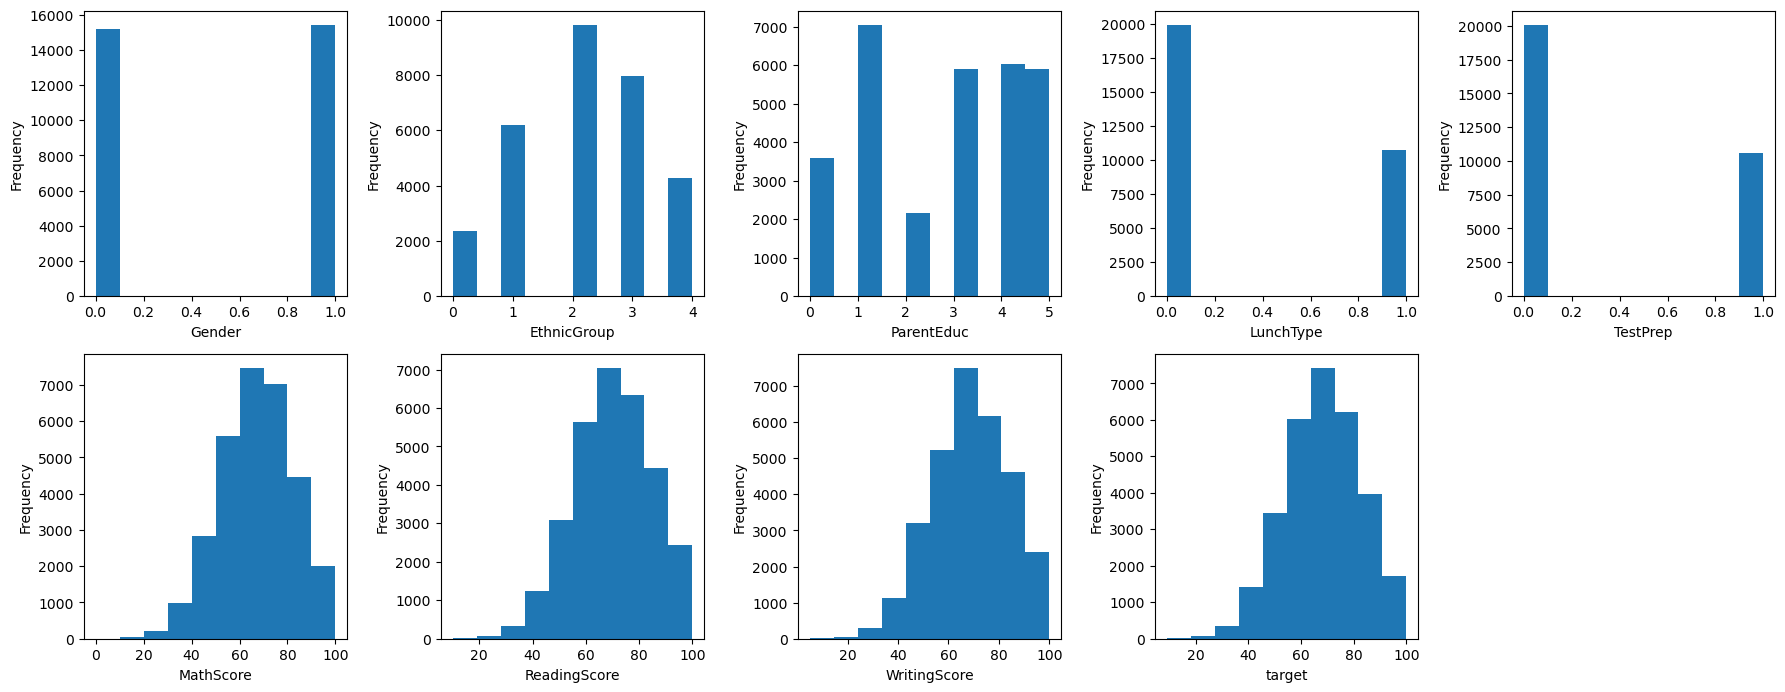

In [10]:
#Now we put all our datas in histograms and then box plots. I choose histograms first just due to preference.
fig = plt.figure(figsize=(18, 10))
i=0
for column in df:
    sub=fig.add_subplot(3,5,i+1)
    sub.set_xlabel(column)
    df[column].plot(kind='hist')
    i=i+1
plt.tight_layout()

The data appears to be concise with no outliers, as each plot has a very consistant frequency. The graphs don't have any variables that stick out super far from the normal stats.

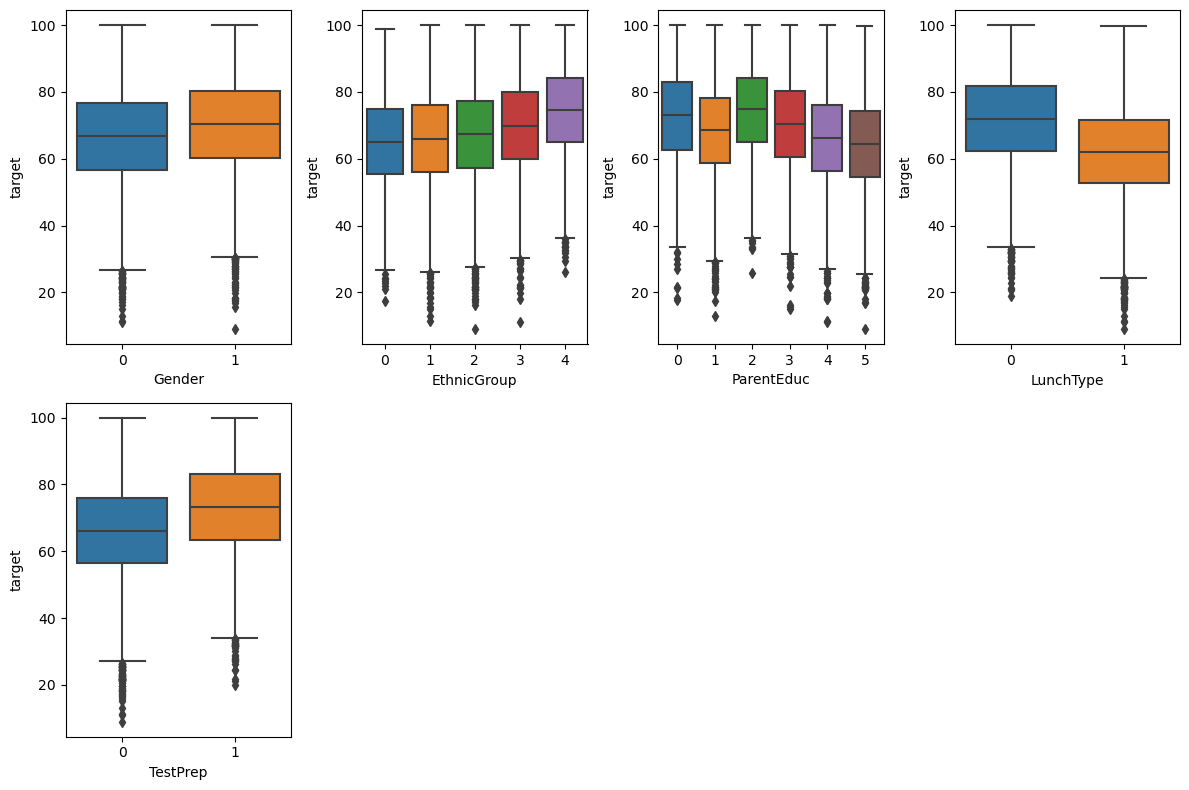

In [41]:
import seaborn as sns

num_list = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep']
plt.figure(figsize = (12, 8))

for column in num_list:
    plt.subplot(2, 4, num_list.index(column) + 1)
    sns.boxplot(x = column, y = 'target', data = df)

plt.tight_layout()
plt.show()

Question 3: Feature Engineering

In [70]:
#We get the P Values from doing a ANOVA F Test. This value is important to the truth of our hypothesis. 
from sklearn.feature_selection import SelectKBest, f_classif, chi2

for column in num_list:
  x = np.array( df.loc[:, 'target']).reshape(-1, 1)
  y = df.loc[:, column]

  fs = SelectKBest(score_func=f_classif, k='all')

  bestFeatures = fs.fit(x, y)
  print(bestFeatures.scores_)
  print(bestFeatures.pvalues_)

[500.06777703]
[6.97204713e-110]
[319.95784449]
[3.35255187e-270]
[296.85429131]
[2.57782217e-311]
[3461.33688399]
[0.]
[1710.47065989]
[0.]


Surprisingly, the data came out to some very high P Values. On the contrary, there are some p values that are just 0. This is because the closer the value is to 0, the more likely the value is to purposfully effecting our target variable, rather than just being a coincidence. 

At least 2 of our columns of data are very very likely to effect our target. That being Lunch Type and Test Prep. Meaning the test scores are mostly effected by the student's energy and time spent studying. 

Question 4: Build The Prediction Model

In [71]:
#Now it's time to build a prediction model. So far, the data is balanced due to the p values. 

#We're going to use Train_Test_Split. Let's get the data split into training and testing datasets.

In [72]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

In [73]:
print("Training set shape:", train_df.shape)
print("Testing set shape:", test_df.shape)

Training set shape: (24512, 9)
Testing set shape: (6129, 9)


In [74]:
#The reason we can't use Cross Validation is because we don't have enough data in some of our categories for it.

The correct algorithm to use for this dataset would most certainly be Logistic Regression. Logistic regression is used to estimate the probability of an event occuring or not occuring. Because we're trying to figure if the factors listed play into the average score of test grades, this is a perfect job for logistic regression. 

Another factor is the size of our dataset. Because this one is very simple and somewhat small, linear regression wouldn't work out very well for us. The size and complexity of our model is important. Evaluating the model would be a task best left to utalize the accuracy score on the tested and predicted test data. 